In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Solow with a one-time permanent increase in gL when A is constant.

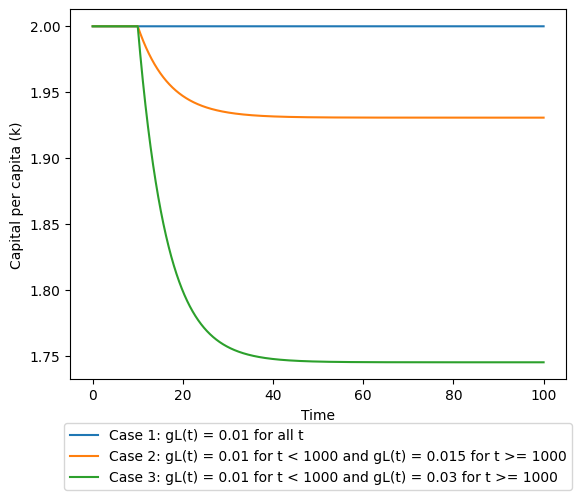

In [16]:
# Set parameters
alpha = 1/3          # Capital share in output
delta = 0.2          # Depreciation rate of capital
gL = 0.01            # Initial growth rate of labor
sI = 0.2             # Saving rate
T = 10000            # Number of time steps in the simulation
dt = 0.01            # Time step size
kss = 2              # Steady-state capital-to-labor ratio (Start at the steady state)
A = 2.151859660851516 # Technology level to achieve kss

# Initialize arrays to store time series data
K_time = np.zeros(T)   # Array to store capital stock over time
time = np.zeros(T)     # Array to store time values (increments of dt)
gL_time = np.zeros(T)  # Array to store the growth rate of labor over time

# Initial values
K_time[0] = kss
time[0] = 0

# Time points for policy changes
T1 = 1000

# Case 1: gL(t) = 0.01 for all t
for t in range(1, T):
    gL_time[t] = gL
    time[t] = time[t - 1] + dt
    K_time[t] = (sI * K_time[t - 1]**alpha * A**(1 - alpha) - (delta + gL_time[t]) * K_time[t - 1]) * dt + K_time[t - 1]

# Plotting the result for Case 1
plt.plot(time, K_time, label="Case 1: gL(t) = 0.01 for all t")

# Case 2: gL(t) = 0.01 for t < 1000 and gL(t) = 0.015 for t >= 1000
K_time = np.zeros(T)
K_time[0] = kss
for t in range(1, T):
    if t < T1:
        gL_time[t] = gL
    else:
        gL_time[t] = 0.015
    time[t] = time[t - 1] + dt
    K_time[t] = (sI * K_time[t - 1]**alpha * A**(1 - alpha) - (delta + gL_time[t]) * K_time[t - 1]) * dt + K_time[t - 1]

# Plotting the result for Case 2
plt.plot(time, K_time, label="Case 2: gL(t) = 0.01 for t < 1000 and gL(t) = 0.015 for t >= 1000")

# Case 3: gL(t) = 0.01 for t < 1000 and gL(t) = 0.03 for t >= 1000
K_time = np.zeros(T)
K_time[0] = kss
for t in range(1, T):
    if t < T1:
        gL_time[t] = gL
    else:
        gL_time[t] = 0.03
    time[t] = time[t - 1] + dt
    K_time[t] = (sI * K_time[t - 1]**alpha * A**(1 - alpha) - (delta + gL_time[t]) * K_time[t - 1]) * dt + K_time[t - 1]

# Plotting the result for Case 3
plt.plot(time, K_time, label="Case 3: gL(t) = 0.01 for t < 1000 and gL(t) = 0.03 for t >= 1000")

# Final plot settings
plt.xlabel("Time")
plt.ylabel("Capital per capita (k)")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1))  # Adjust location to move legend down
plt.show()


#  Solow with a one-time permanent increase in gL when A is growing at a constant rate, gA.

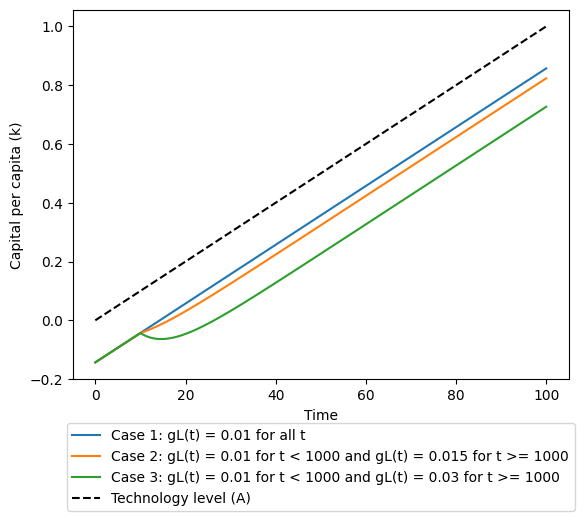

In [17]:
# Set parameters
alpha = 1/3          # Capital share in output
delta = 0.2          # Depreciation rate of capital
gL = 0.01            # Initial growth rate of labor
gA = 0.01            # Growth rate of technology
sI = 0.2             # Saving rate
A_initial = 1.0      # Initial value of technology

ktilde_ss = (sI / (delta + gL + gA))**(1 / (1 - alpha))  # Steady-state capital per capita
kss = ktilde_ss * A_initial  # Steady-state capital per worker

T = 10000            # Number of time steps in the simulation
dt = 0.01            # Time step size

A = A_initial        # Initial technology level

# Initialize arrays to store time series data
K_time = np.zeros(T)   # Array to store capital stock over time
time = np.zeros(T)     # Array to store time values (increments of dt)
gL_time = np.zeros(T)  # Array to store the growth rate of labor over time
A_time = np.zeros(T)   # Array to store technology level over time

# Initial values
K_time[0] = kss
time[0] = 0
A_time[0] = A_initial

# Time points for policy changes
T1 = 1000

# Case 1: gL(t) = 0.01 for all t
for t in range(1, T):
    gL_time[t] = gL
    time[t] = time[t - 1] + dt
    A_time[t] = A_time[t - 1] + gA * A_time[t - 1] * dt
    K_time[t] = (sI * K_time[t - 1]**alpha * A_time[t - 1]**(1 - alpha) - (delta + gL_time[t]) * K_time[t - 1]) * dt + K_time[t - 1]

# Plotting the result for Case 1
plt.plot(time, np.log(K_time), label="Case 1: gL(t) = 0.01 for all t")

# Case 2: gL(t) = 0.01 for t < 1000 and gL(t) = 0.015 for t >= 1000
K_time = np.zeros(T)
K_time[0] = kss
A_time = np.zeros(T)
A_time[0] = A_initial
for t in range(1, T):
    if t < T1:
        gL_time[t] = gL
    else:
        gL_time[t] = 0.015
    time[t] = time[t - 1] + dt
    A_time[t] = A_time[t - 1] + gA * A_time[t - 1] * dt
    K_time[t] = (sI * K_time[t - 1]**alpha * A_time[t - 1]**(1 - alpha) - (delta + gL_time[t]) * K_time[t - 1]) * dt + K_time[t - 1]

# Plotting the result for Case 2
plt.plot(time, np.log(K_time), label="Case 2: gL(t) = 0.01 for t < 1000 and gL(t) = 0.015 for t >= 1000")

# Case 3: gL(t) = 0.01 for t < 1000 and gL(t) = 0.03 for t >= 1000
K_time = np.zeros(T)
K_time[0] = kss
A_time = np.zeros(T)
A_time[0] = A_initial
for t in range(1, T):
    if t < T1:
        gL_time[t] = gL
    else:
        gL_time[t] = 0.03
    time[t] = time[t - 1] + dt
    A_time[t] = A_time[t - 1] + gA * A_time[t - 1] * dt
    K_time[t] = (sI * K_time[t - 1]**alpha * A_time[t - 1]**(1 - alpha) - (delta + gL_time[t]) * K_time[t - 1]) * dt + K_time[t - 1]

# Plotting the result for Case 3
plt.plot(time, np.log(K_time), label="Case 3: gL(t) = 0.01 for t < 1000 and gL(t) = 0.03 for t >= 1000")

plt.plot(time, np.log(A_time), color="black", label="Technology level (A)", linestyle="--")

# Final plot settings
plt.xlabel("Time")
plt.ylabel("Capital per capita (k)")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1))  # Adjust location to move legend down
plt.show()

# Solow with a one-time permanent increase in gL when A is determined by Romer.

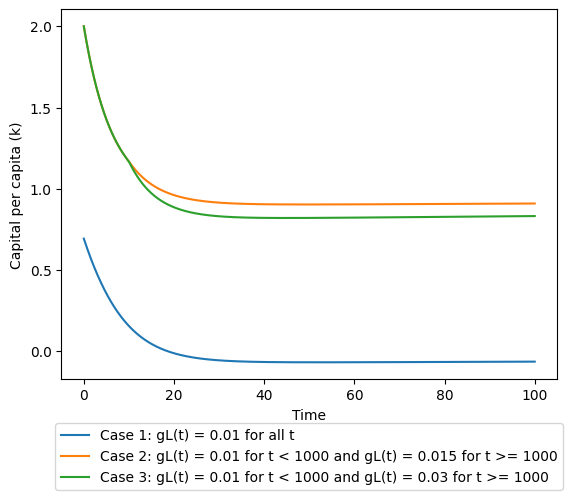

In [18]:
# Set parameters
alpha = 1/3          # Capital share in output
delta = 0.2          # Depreciation rate of capital
gL = 0.01            # Initial growth rate of labor
sI = 0.2             # Saving rate
T = 10000            # Number of time steps in the simulation
dt = 0.01            # Time step size
theta = 0.01         # Parameter for Romer model
lambda_ = 1          # Parameter for Romer model
phi = 0              # Parameter for Romer model
A_initial = 1        # Initial value of technology
kss = 2              # Steady-state capital-to-labor ratio
A = A_initial        # Initial technology level

# Initialize arrays to store time series data
K_time = np.zeros(T)   # Array to store capital stock over time
time = np.zeros(T)     # Array to store time values (increments of dt)
gL_time = np.zeros(T)  # Array to store the growth rate of labor over time
A_time = np.zeros(T)   # Array to store technology level over time

# Initial values
K_time[0] = kss * A_initial
time[0] = 0
A_time[0] = A_initial

# Time points for policy changes
T1 = 1000

# Case 1: gL(t) = 0.01 for all t
for t in range(1, T):
    gL_time[t] = gL
    time[t] = time[t - 1] + dt
    A_time[t] = A_time[t - 1] + (theta * (A_time[t - 1]**phi) * (gL_time[t]**lambda_)) * dt
    K_time[t] = (sI * K_time[t - 1]**alpha * A_time[t - 1]**(1 - alpha) - (delta + gL_time[t]) * K_time[t - 1]) * dt + K_time[t - 1]

# Plotting the result for Case 1
plt.plot(time, np.log(K_time), label="Case 1: gL(t) = 0.01 for all t")

# Case 2: gL(t) = 0.01 for t < 1000 and gL(t) = 0.015 for t >= 1000
K_time = np.zeros(T)
K_time[0] = kss * A_initial
A_time = np.zeros(T)
A_time[0] = A_initial
for t in range(1, T):
    if t < T1:
        gL_time[t] = gL
    else:
        gL_time[t] = 0.015
    time[t] = time[t - 1] + dt
    A_time[t] = A_time[t - 1] + (theta * (A_time[t - 1]**phi) * (gL_time[t]**lambda_)) * dt
    K_time[t] = (sI * K_time[t - 1]**alpha * A_time[t - 1]**(1 - alpha) - (delta + gL_time[t]) * K_time[t - 1]) * dt + K_time[t - 1]

# Plotting the result for Case 2
plt.plot(time, K_time, label="Case 2: gL(t) = 0.01 for t < 1000 and gL(t) = 0.015 for t >= 1000")

# Case 3: gL(t) = 0.01 for t < 1000 and gL(t) = 0.03 for t >= 1000
K_time = np.zeros(T)
K_time[0] = kss * A_initial
A_time = np.zeros(T)
A_time[0] = A_initial
for t in range(1, T):
    if t < T1:
        gL_time[t] = gL
    else:
        gL_time[t] = 0.03
    time[t] = time[t - 1] + dt
    A_time[t] = A_time[t - 1] + (theta * (A_time[t - 1]**phi) * (gL_time[t]**lambda_)) * dt
    K_time[t] = (sI * K_time[t - 1]**alpha * A_time[t - 1]**(1 - alpha) - (delta + gL_time[t]) * K_time[t - 1]) * dt + K_time[t - 1]

# Plotting the result for Case 3
plt.plot(time, K_time, label="Case 3: gL(t) = 0.01 for t < 1000 and gL(t) = 0.03 for t >= 1000")

# Final plot settings
plt.xlabel("Time")
plt.ylabel("Capital per capita (k)")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1))  # Adjust location to move legend down
plt.show()